# Lista 5

## Ćwiczenia

In [1]:
# wczytanie paczki
library(blorr)

In [2]:
# wczytanie danych
data(hsb2)
# ukazanie pierwszych 6 wierszy wczytanych danych
head(hsb2)

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,honcomp
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<fct>
1,70,0,4,1,1,1,57,52,41,47,57,0
2,121,1,4,2,1,3,68,59,53,63,61,0
3,86,0,4,3,1,1,44,33,54,58,31,0
4,141,0,4,3,1,3,63,44,47,53,56,0
5,172,0,4,2,1,2,47,52,57,53,61,0
6,113,0,4,2,1,2,44,52,51,63,61,0


In [3]:
# wyciagniecie okreslonych kolumn ze zbioru danych
uczniowie = hsb2[, c(6, 4, 8)]
# zmiana nazw kolumn
colnames(uczniowie) = c("program", "status.ek.", "pisanie")
# ukazanie pierwszych 6 wierszy naszych danych
head(uczniowie)

,program,status.ek.,pisanie
,<fct>,<fct>,<int>
1,1,1,52
2,3,2,59
3,1,3,33
4,3,3,44
5,2,2,52
6,2,2,52


In [4]:
# sprawdzenie wymiarow naszych danych
dim(uczniowie)

[1] 200   3

#### i) Wygeneruj podpróbę uczącą, resztę przyjmij jako zbiór testowy.

In [5]:
# sprawdzenie licznosci w podgrupach zaleznie od wartosci zmiennej program
table(uczniowie$program)


  1   2   3 
 45 105  50 

In [6]:
# przy pobraniu losowo 150 obserwacji moze dojsc do wykluczenia albo 1 albo 3 grupy, a ich wzajemny stosunek moze byc zaburzony

In [7]:
# okreslenie liczby obserwacji z kazdego podzbioru w podzbiorze uczacym
as.integer(table(uczniowie$program)*0.75)

[1] 33 78 37

In [8]:
# stworzenie podzbiorow zaleznie od wartosci zmiennej program
uczniowie_program_1 = uczniowie[uczniowie$program == 1, ]
uczniowie_program_2 = uczniowie[uczniowie$program == 2, ]
uczniowie_program_3 = uczniowie[uczniowie$program == 3, ]

In [9]:
# wylosowanie obserwacji z naszych podzbiorow (bez powtarzania sie)
#uczniowie_wektor_1 = sort(sample(1:nrow(uczniowie_program_1), 33, replace = FALSE))
#uczniowie_wektor_2 = sort(sample(1:nrow(uczniowie_program_2), 78, replace = FALSE))
#uczniowie_wektor_3 = sort(sample(1:nrow(uczniowie_program_3), 37, replace = FALSE))
uczniowie_wektor_1 = c(1, 3, 4, 5, 10, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 44, 45)
uczniowie_wektor_2 = c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 34, 37, 38, 40, 41, 43, 44, 48, 49, 50, 52, 53, 55, 57, 58, 59, 60, 61, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 86, 87, 91, 92, 93, 94, 95, 96, 98, 99, 101, 102, 103, 104, 105)
uczniowie_wektor_3 = c(1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15, 16, 17, 18, 19, 21, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 43, 45, 48, 49, 50)
# wyswietlenie wektorow
uczniowie_wektor_1
uczniowie_wektor_2
uczniowie_wektor_3

[1]  1  3  4  5 10 11 12 13 14 15 17 19 20 21 22 23 24 25 26 27 28 30 32 33 34
[26] 35 36 37 38 39 40 44 45

[1]   2   3   4   5   6   7   8   9  10  11  12  13  15  17  18  19  20  21  22
[20]  23  24  25  26  28  29  31  32  33  34  37  38  40  41  43  44  48  49  50
[39]  52  53  55  57  58  59  60  61  64  65  66  68  69  70  71  72  73  75  76
[58]  77  78  80  81  82  83  86  87  91  92  93  94  95  96  98  99 101 102 103
[77] 104 105

[1]  1  2  3  4  5  6  7  9 11 12 14 15 16 17 18 19 21 23 24 26 27 29 30 31 32
[26] 33 34 35 37 39 40 41 43 45 48 49 50

In [10]:
# stworzenie podzbiorow uczacego i testowego laczac otrzymane podzbiory wybierajac okreslone wiersze z naszych danych
uczniowie_podzbior_uczacy = rbind(uczniowie_program_1[uczniowie_wektor_1, ], uczniowie_program_2[uczniowie_wektor_2, ], uczniowie_program_3[uczniowie_wektor_3, ])
uczniowie_podzbior_testowy = rbind(uczniowie_program_1[-uczniowie_wektor_1, ], uczniowie_program_2[-uczniowie_wektor_2, ], uczniowie_program_3[-uczniowie_wektor_3, ])
# wyswietlenie obu podzbiorow
uczniowie_podzbior_uczacy
uczniowie_podzbior_testowy

,program,status.ek.,pisanie
,<fct>,<fct>,<int>
1,1,1,52
7,1,2,59
9,1,2,57
16,1,1,49
31,1,2,31
36,1,3,65
44,1,1,41
45,1,3,65
46,1,1,59


,program,status.ek.,pisanie
,<fct>,<fct>,<int>
3,1,3,33
18,1,2,57
20,1,2,39
21,1,2,49
30,1,1,44
63,1,1,44
71,1,2,44
128,1,2,53
154,1,2,54


In [11]:
# wymiary naszych podzbiorow uczacego i testowego
dim(uczniowie_podzbior_uczacy)
dim(uczniowie_podzbior_testowy)

[1] 148   3

[1] 52  3

In [12]:
# nie udalo nam sie stworzyc proby uczacej o licznosci 150, co jest skutkiem zaokraglen podczas okreslania liczby pobieranych obserwacji z kazdego podzbioru

#### ii) Przedstaw tabelę liczności w grupach, tabelę wartości średnich i odchyleń standardowych w grupach wyznaczone na podstawie zbioru uczącego.

In [13]:
# tabela liczbnosci w grupach
tabela_licznosci = table(Program = uczniowie_podzbior_uczacy$program, Status.ekonomiczny = uczniowie_podzbior_uczacy$status.ek.)
tabela_licznosci

       Status.ekonomiczny
Program  1  2  3
      1 14 12  7
      2 14 34 30
      3  9 23  5

In [14]:
# srednie wyniki dla okreslonych grup zmiennej program
uczniowie_podzbior_uczacy_srednia = aggregate(uczniowie_podzbior_uczacy$pisanie, by = list(uczniowie_podzbior_uczacy$program), FUN = "mean")
# w funkcji aggregate najpierw wybieramy interesujaca nas zmienna, potem wzgledem ktorej jest ona grupowana (by), a nastepnie funkcje ktora chcemy zastosowac (FUN)
# zmiana nazw kolumn w tabeli
colnames(uczniowie_podzbior_uczacy_srednia) = c("program", "sredni.wynik")
# wyswietlenie srednich w tabeli
uczniowie_podzbior_uczacy_srednia

program,sredni.wynik
<fct>,<dbl>
1,52.51515
2,56.43590
3,46.86486


In [15]:
# wartosc odchylenia standardowego dla okreslonych grup zmiennej program
uczniowie_podzbior_uczacy_od = aggregate(uczniowie_podzbior_uczacy$pisanie, by = list(uczniowie_podzbior_uczacy$program), FUN = "sd")
# w funkcji aggregate najpierw wybieramy interesujaca nas zmienna, potem wzgledem ktorej jest ona grupowana (by), a nastepnie funkcje ktora chcemy zastosowac (FUN)
# zmiana nazw kolumn w tabeli
colnames(uczniowie_podzbior_uczacy_od) = c("program", "sd.wynik")
# wyswietlenie odchylen standardowych w tabeli
uczniowie_podzbior_uczacy_od

program,sd.wynik
<fct>,<dbl>
1,9.679622
2,7.531044
3,9.046676


#### iii) Dokonaj dopasowania modelu log-liniowego.

In [16]:
# wczytanie paczki
library(nnet)

In [17]:
# przygotowanie modelu log-liniowego zaleznosci pomiedzy zmienna program a zmiennymi status.ek. oraz pisanie
model_log_lin = multinom(program ~ status.ek. + pisanie, data = uczniowie_podzbior_uczacy)
# podsumowanie modelu
summary(model_log_lin)

# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 131.773937
final  value 131.763084 
converged


Call:
multinom(formula = program ~ status.ek. + pisanie, data = uczniowie_podzbior_uczacy)

Coefficients:
  (Intercept) status.ek.2 status.ek.3     pisanie
2   -2.365895   0.9415124   1.2500192  0.04521637
3    3.038457   1.2633245   0.4411535 -0.07280777

Std. Errors:
  (Intercept) status.ek.2 status.ek.3    pisanie
2    1.420767   0.5136558   0.5803211 0.02617122
3    1.437173   0.5829055   0.7589558 0.02878251

Residual Deviance: 263.5262 
AIC: 279.5262 

In [18]:
# zbieznosc ostatecznie zostala uzyskana (informacja: converged)
# widzimy okreslone wspolczynniki w czesci Coefficients, sa one dla wartosci zmiennej program wynoszacej 2 oraz 3, poniewaz 1 jest wartoscia referencyjna
# dla kazdej z wartosci zmiennej program mamy inna postac estymatora
# kryterium informacyjne Akaikego (AIC) wynosi 279.5162

#### iv) Wyznacz prawdopodobieństwa przynależności do klas oraz klasę przewidywaną w oparciu o regułę Bayesa.

In [19]:
# predykcja prawdopodobienstw przynaleznosci do klas podzbioru uczacego w oparciu o regule Bayesa
predykcja_prawdopodobienstwo_model_log_lin_podzbior_uczacy = predict(model_log_lin, type = "probs")
# dzieki opcji: type = "probs" widzimy wartosci prawdopodobienstw dla kazdej z klas
predykcja_prawdopodobienstwo_model_log_lin_podzbior_uczacy

,1,2,3
1,0.4066710,0.4007595,0.19256951
7,0.1826995,0.6334789,0.18382157
9,0.1875686,0.5941286,0.21830277
16,0.4082337,0.3512673,0.24049896
31,0.1030425,0.1007324,0.79622514
36,0.1337390,0.8280549,0.03820611
44,0.3767801,0.2257975,0.39742245
45,0.1337390,0.8280549,0.03820611
46,0.3792423,0.5128826,0.10787506
53,0.1736541,0.3055777,0.52076819


In [20]:
# predykcja przynaleznosci do klas podzbioru uczacego w oparciu o regule Bayesa
predykcja_model_log_lin_podzbior_uczacy = predict(model_log_lin)
predykcja_model_log_lin_podzbior_uczacy

[1] 1 2 2 1 3 2 3 2 2 3 3 2 2 1 1 2 2 2 2 2 2 1 2 3 2 2 3 1 2 2 2 3 2 2 3 2 2
 [38] 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
[112] 2 2 3 2 3 3 2 3 2 2 3 2 3 3 3 3 1 2 3 3 2 1 3 2 2 3 2 2 3 2 2 2 1 3 2 2 3
Levels: 1 2 3

#### v) Przedstaw tabelę klasyfikacji i wyznacz błąd klasyfikacji, zmiennej pisanie przypisz jej wartość średnią.

In [21]:
# predykcja przynaleznosci do klas dla podzbioru testowego
predykcja_model_log_lin_podzbior_testowy = predict(model_log_lin, newdata = uczniowie_podzbior_testowy)
predykcja_model_log_lin_podzbior_testowy

[1] 3 2 3 2 1 1 3 2 2 3 2 2 2 3 2 3 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 3 3 3 3 3 1 3 2 3 2 2 2 2
Levels: 1 2 3

In [22]:
# tabela predykcji dla podzbioru testowego
tabela_predykcji_model_log_lin_podzbior_testowy = table(True = uczniowie_podzbior_testowy$program, Predicted = predykcja_model_log_lin_podzbior_testowy)
tabela_predykcji_model_log_lin_podzbior_testowy

    Predicted
True  1  2  3
   1  2  6  4
   2  2 23  2
   3  1  5  7

In [23]:
# wartosc bledu klasyfikacji dla podzbioru testowego
blad_klasyfikacji_model_log_lin_podzbior_testowy = (1 - sum(diag(tabela_predykcji_model_log_lin_podzbior_testowy)) / sum(tabela_predykcji_model_log_lin_podzbior_testowy)) * 100
blad_klasyfikacji_model_log_lin_podzbior_testowy

[1] 38.46154

In [24]:
# stworzenie nowego podzbioru uczacego
uczniowie_podzbior_uczacy_2 = merge(uczniowie_podzbior_uczacy, uczniowie_podzbior_uczacy_srednia, by = "program", all.x = TRUE)
# laczymy 2 podzbiory wzgledem zmiennej program (by = "program"), wszystkie elementy podzbioru uczacego maja zostac (all.x = TRUE)
# ukazanie nowego podzbioru uczacego
uczniowie_podzbior_uczacy_2

program,status.ek.,pisanie,sredni.wynik
<fct>,<fct>,<int>,<dbl>
1,1,52,52.51515
1,2,59,52.51515
1,2,57,52.51515
1,1,49,52.51515
1,2,31,52.51515
1,3,65,52.51515
1,1,41,52.51515
1,3,65,52.51515
1,1,59,52.51515


In [25]:
# przygotowanie modelu log-liniowego zaleznosci pomiedzy zmienna program a zmiennymi status.ek. oraz sredni.wynik dla nowego podzbioru uczacego
model_log_lin_2 = multinom(program ~ status.ek. + sredni.wynik, data = uczniowie_podzbior_uczacy_2)
# podsumowanie modelu
summary(model_log_lin_2)

# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 10.276323
iter  20 value 0.039206
iter  30 value 0.036750
iter  40 value 0.035852
iter  50 value 0.035129
iter  60 value 0.033874
iter  70 value 0.033163
iter  80 value 0.032693
iter  90 value 0.031892
iter 100 value 0.031225
final  value 0.031225 
stopped after 100 iterations


Call:
multinom(formula = program ~ status.ek. + sredni.wynik, data = uczniowie_podzbior_uczacy_2)

Coefficients:
  (Intercept) status.ek.2 status.ek.3 sredni.wynik
2   -224.5457   0.3922782   0.4804174     4.125231
3    194.2743   0.9122633   0.2830713    -3.925789

Std. Errors:
  (Intercept) status.ek.2 status.ek.3 sredni.wynik
2    160.4342    13.97798    15.11397     2.957302
3    553.7864    67.27995    88.06821    11.438129

Residual Deviance: 0.06245004 
AIC: 16.06245 

In [26]:
# srednie wyniki dla okreslonych grup zmiennej program
uczniowie_podzbior_testowy_srednia = aggregate(uczniowie_podzbior_testowy$pisanie, by = list(uczniowie_podzbior_testowy$program), FUN = "mean")
# w funkcji aggregate najpierw wybieramy interesujaca nas zmienna, potem wzgledem ktorej jest ona grupowana (by), a nastepnie funkcje ktora chcemy zastosowac (FUN)
# zmiana nazw kolumn w tabeli
colnames(uczniowie_podzbior_testowy_srednia) = c("program", "sredni.wynik")
# wyswietlenie srednich w tabeli
uczniowie_podzbior_testowy_srednia

program,sredni.wynik
<fct>,<dbl>
1,48.08333
2,55.74074
3,46.46154


In [27]:
# stworzenie nowego podzbioru testowego
uczniowie_podzbior_testowy_2 = merge(uczniowie_podzbior_testowy, uczniowie_podzbior_testowy_srednia, by = "program", all.x = TRUE)
# laczymy 2 podzbiory wzgledem zmiennej program (by), wszystkie elementy podzbioru testowego maja zostac (all.x = TRUE)
# ukazanie nowego podzbioru testowego
uczniowie_podzbior_testowy_2

program,status.ek.,pisanie,sredni.wynik
<fct>,<fct>,<int>,<dbl>
1,3,33,48.08333
1,2,57,48.08333
1,2,39,48.08333
1,2,49,48.08333
1,1,44,48.08333
1,1,44,48.08333
1,2,44,48.08333
1,2,53,48.08333
1,2,54,48.08333


In [28]:
# predykcja dla nowego zbioru testowego
predykcja_model_log_lin_podzbior_testowy_2 = predict(model_log_lin_2, newdata = uczniowie_podzbior_testowy_2)
predykcja_model_log_lin_podzbior_testowy_2

[1] 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [29]:
# tabela predykcji dla nowego podzbioru testowego
tabela_predykcji_model_log_lin_podzbior_testowy_2 = table(True = uczniowie_podzbior_testowy_2$program, Predicted = predykcja_model_log_lin_podzbior_testowy_2)
tabela_predykcji_model_log_lin_podzbior_testowy_2

    Predicted
True  1  2  3
   1  0  0 12
   2  0 27  0
   3  0  0 13

In [30]:
# blad klasyfikacji dla nowego podzbioru testowego
blad_klasyfikacji_model_log_lin_podzbior_testowy_2 = (1 - sum(diag(tabela_predykcji_model_log_lin_podzbior_testowy_2)) / sum(tabela_predykcji_model_log_lin_podzbior_testowy_2)) * 100
blad_klasyfikacji_model_log_lin_podzbior_testowy_2

[1] 23.07692

In [31]:
# wartosc bledu klasyfikacji dla podzbioru testowego po uwzglednieniu sredniej w kolumnie sredni.wynik zmalala az o 15%

#### vi) Analiza LDA, błąd klasyfikacji, porównanie z wynikiem uzyskanym w $iv)$.

In [32]:
# wczytanie pakietu
library(MASS)

In [33]:
# przygotownaie modelu liniowego zaleznosci zmiennej program od zmiennych status.ek. oraz pisanie
model_lda = lda(program ~ status.ek. + pisanie, data = uczniowie_podzbior_uczacy)
model_lda

Call:
lda(program ~ status.ek. + pisanie, data = uczniowie_podzbior_uczacy)

Prior probabilities of groups:
       1        2        3 
0.222973 0.527027 0.250000 

Group means:
  status.ek.2 status.ek.3  pisanie
1   0.3636364   0.2121212 52.51515
2   0.4358974   0.3846154 56.43590
3   0.6216216   0.1351351 46.86486

Coefficients of linear discriminants:
                   LD1        LD2
status.ek.2  0.2365065 -2.3967543
status.ek.3 -0.6092668 -2.3219699
pisanie     -0.1059665  0.0191953

Proportion of trace:
   LD1    LD2 
0.8441 0.1559 

In [34]:
# predykcja klas dla podzbioru testowego na podstawie modelu liniowego
predykcja_model_lda_podzbior_testowy = predict(model_lda, newdata = uczniowie_podzbior_testowy)$class
predykcja_model_lda_podzbior_testowy

[1] 3 2 3 2 1 1 3 2 2 3 2 2 2 3 2 3 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 3 3 3 3 3 1 3 2 3 2 2 2 2
Levels: 1 2 3

In [35]:
# tabela predykcji dla podzbioru testowego na podstawie modelu liniowego
tabela_predykcji_model_lda_podzbior_testowy = table(True = uczniowie_podzbior_testowy$program, Predicted = predykcja_model_lda_podzbior_testowy)
tabela_predykcji_model_lda_podzbior_testowy

    Predicted
True  1  2  3
   1  2  6  4
   2  2 23  2
   3  1  5  7

In [36]:
# blad klasyfikacji dla podzbioru testowego dla modelu liniowego
blad_klasyfikacji_model_lda_podzbior_testowy = (1 - sum(diag(tabela_predykcji_model_lda_podzbior_testowy)) / sum(tabela_predykcji_model_lda_podzbior_testowy)) * 100
blad_klasyfikacji_model_lda_podzbior_testowy

[1] 38.46154

In [37]:
# blad klasyfikacji jest identyczny jak w przypadku standardowego modelu log-liniowego
# wartosci bledow sa bardzo mocno skorelowane z wygenerowanymi zbiorami uczacym oraz testowym

#### vii) Powtórz analizę modeli 10 razy, generując na nowo próbę uczącą, wyznacz proporcję poprawnych klasyfikacji i średnią proporcję poprawnych klasyfikacji dla obu metod.

In [38]:
bledna_klasyfikacja_log_lin = c()
bledna_klasyfikacja_lda = c()

In [39]:
# powtorzenie 10-krotne analizy modeli
for (i in 1:10) {
# wylosowanie obserwacji z naszych podzbiorow (bez powtarzania sie)
    uczniowie_wektor_1_powtorzenie = sort(sample(1:nrow(uczniowie_program_1), 33, replace = FALSE))
    uczniowie_wektor_2_powtorzenie = sort(sample(1:nrow(uczniowie_program_2), 78, replace = FALSE))
    uczniowie_wektor_3_powtorzenie = sort(sample(1:nrow(uczniowie_program_3), 37, replace = FALSE)) 
# stworzenie podzbiorow uczacego i testowego laczac otrzymane podzbiory wybierajac okreslone wiersze z naszych danych
    uczniowie_podzbior_uczacy_powtorzenie = rbind(uczniowie_program_1[uczniowie_wektor_1_powtorzenie, ], uczniowie_program_2[uczniowie_wektor_2_powtorzenie, ], uczniowie_program_3[uczniowie_wektor_3_powtorzenie, ])
    uczniowie_podzbior_testowy_powtorzenie = rbind(uczniowie_program_1[-uczniowie_wektor_1_powtorzenie, ], uczniowie_program_2[-uczniowie_wektor_2_powtorzenie, ], uczniowie_program_3[-uczniowie_wektor_3_powtorzenie, ])
# analiza dla modelu log-liniowego
# przygotownaie modelu log-liniowego zaleznosci zmiennej program od zmiennych status.ek. oraz pisanie
    model_log_lin = multinom(program ~ status.ek. + pisanie, data = uczniowie_podzbior_uczacy_powtorzenie)
# predykcja klas dla podzbioru testowego na podstawie modelu log-liniowego
    predykcja_model_log_lin_podzbior_testowy_powtorzenie = predict(model_log_lin, newdata = uczniowie_podzbior_testowy_powtorzenie)
# tabela predykcji dla podzbioru testowego dla modelu log-liniowego
    tabela_predykcji_model_log_lin_podzbior_testowy_powtorzenie = table(True = uczniowie_podzbior_testowy_powtorzenie$program, Predicted = predykcja_model_log_lin_podzbior_testowy_powtorzenie)
# blad klasyfikacji dla nowego podzbioru testowego dla modelu log-liniowego
    bledna_klasyfikacja_log_lin[i] = (1 - sum(diag(tabela_predykcji_model_log_lin_podzbior_testowy_powtorzenie)) / sum(tabela_predykcji_model_log_lin_podzbior_testowy_powtorzenie)) * 100
# analiza dla modelu liniowego
# przygotownaie modelu log-liniowego zaleznosci zmiennej program od zmiennych status.ek. oraz pisanie
    model_lda = lda(program ~ status.ek. + pisanie, data = uczniowie_podzbior_uczacy_powtorzenie)
# predykcja klas dla podzbioru testowego na podstawie modelu liniowego
    predykcja_model_lda_podzbior_testowy_powtorzenie = predict(model_lda, newdata = uczniowie_podzbior_uczacy_powtorzenie)$class
# tabela predykcji dla podzbioru testowego dla modelu liniowego
    tabela_predykcji_model_lda_podzbior_testowy_powtorzenie = table(True = uczniowie_podzbior_uczacy_powtorzenie$program, Predicted = predykcja_model_lda_podzbior_testowy_powtorzenie)
# blad klasyfikacji dla podzbioru testowego dla modelu liniowego
    bledna_klasyfikacja_lda[i] = (1 - sum(diag(tabela_predykcji_model_lda_podzbior_testowy_powtorzenie)) / sum(tabela_predykcji_model_lda_podzbior_testowy_powtorzenie)) * 100
}

# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 129.839501
final  value 129.815281 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 134.301369
final  value 134.284092 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 132.136205
final  value 132.129337 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 130.079473
final  value 129.998815 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 133.846385
final  value 133.820782 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 134.189128
final  value 134.182489 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 134.030650
final  value 134.018747 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 131.029740
final  value 131.019589 
converged
# weights:  15 (8 variable)
initial  value 162.594619 
iter  10 value 12

In [40]:
# obliczenie sredniej proporcji blednych klasyfikacji
srednia_bledna_klasyfikacja_log_lin = mean(bledna_klasyfikacja_log_lin)
srednia_bledna_klasyfikacja_lda = mean(bledna_klasyfikacja_lda)
# wyswietlenie sredniej proporcji blednych klasyfikacji
srednia_bledna_klasyfikacja_log_lin
srednia_bledna_klasyfikacja_lda

[1] 41.34615

[1] 39.05405

In [41]:
# podsumowanie proporcji blednych klasyfikacji
summary(bledna_klasyfikacja_log_lin)
summary(bledna_klasyfikacja_lda)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.62   38.46   40.38   41.35   44.23   48.08 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  35.81   37.50   39.53   39.05   41.05   41.22 

In [42]:
# sredni blad oraz wartosci minimalne sa do siebie zblizone dla obu modeli, odbiega jedynie wartosc maksymalna (na korzysc modelu liniowego)

In [43]:
# obliczenie sredniej proporcji poprawnych klasyfikacji
srednia_poprawna_klasyfikacja_log_lin = 100 - srednia_bledna_klasyfikacja_log_lin
srednia_poprawna_klasyfikacja_lda = 100 - srednia_bledna_klasyfikacja_lda
# wyswietlenie sredniej proporcji poprawnych klasyfikacji
srednia_poprawna_klasyfikacja_log_lin
srednia_poprawna_klasyfikacja_lda

[1] 58.65385

[1] 60.94595

In [44]:
# roznice pomiedzy obiema wartosciami poprawnych klasyfikacji wynosza co najwyzej pare procent, sa do siebie dosyc zblizone

#### viii) Wygeneruj nowe wartości dla zmiennych $status.ek.$ oraz $pisanie$, wyznacz wartości prawdopodobieństw przynależności obserwacji do każdej z trzech grup oraz średnie wartości tych prawdopodobieństw w grupach.

In [45]:
# stworzenie podzbiorow zaleznie od wartosci zmiennej status.ek.
uczniowie_status.ek._1 = uczniowie[uczniowie$status.ek. == 1, ]
uczniowie_status.ek._2 = uczniowie[uczniowie$status.ek. == 2, ]
uczniowie_status.ek._3 = uczniowie[uczniowie$status.ek. == 3, ]

In [46]:
# wylosowanie nowych wartosci dla zmiennej pisanie dla kazdego podzbioru zmiennej status.ek.
#uczniowie_status.ek._1$pisanie = sample(30:70, nrow(uczniowie_status.ek._1), replace = TRUE)
#uczniowie_status.ek._2$pisanie = sample(30:70, nrow(uczniowie_status.ek._2), replace = TRUE)
#uczniowie_status.ek._3$pisanie = sample(30:70, nrow(uczniowie_status.ek._3), replace = TRUE)
uczniowie_status.ek._1$pisanie = c(64, 66, 36, 32, 36, 33, 32, 34, 33, 50, 63, 45, 30, 53, 35, 49, 53, 36, 38, 57, 48, 32, 33, 49, 30, 34, 66, 69, 52, 43, 56, 51, 59, 46, 62, 43, 56, 41, 67, 31, 44, 64, 60, 45, 60, 31, 38)
uczniowie_status.ek._2$pisanie = c(55, 31, 57, 58, 34, 35, 49, 55, 57, 30, 43, 68, 52, 59, 65, 63, 50, 36, 62, 36, 59, 46, 43, 67, 34, 66, 45, 56, 34, 37, 48, 41, 50, 55, 36, 70, 41, 56, 35, 56, 68, 70, 41, 41, 60, 58, 42, 66, 70, 43, 65, 49, 38, 66, 70, 52, 32, 70, 32, 43, 45, 50, 32, 58, 37, 59, 58, 46, 55, 57, 53, 69, 58, 45, 32, 34, 60, 61, 42, 36, 34, 45, 54, 67, 33, 61, 43, 60, 50, 53, 62, 54, 41, 59, 56)
uczniowie_status.ek._3$pisanie = c(36, 30, 69, 49, 67, 36, 30, 53, 45, 36, 66, 62, 64, 31, 65, 40, 42, 56, 69, 36, 61, 40, 58, 55, 45, 65, 56, 54, 57, 34, 41, 61, 44, 31, 67, 33, 61, 50, 39, 43, 39, 49, 32, 67, 56, 61, 56, 51, 60, 60, 49, 63, 49, 33, 42, 65, 62, 57)
# wyswietlenie nowych wartosci zmiennej pisanie
uczniowie_status.ek._1$pisanie
uczniowie_status.ek._2$pisanie
uczniowie_status.ek._3$pisanie

[1] 64 66 36 32 36 33 32 34 33 50 63 45 30 53 35 49 53 36 38 57 48 32 33 49 30
[26] 34 66 69 52 43 56 51 59 46 62 43 56 41 67 31 44 64 60 45 60 31 38

[1] 55 31 57 58 34 35 49 55 57 30 43 68 52 59 65 63 50 36 62 36 59 46 43 67 34
[26] 66 45 56 34 37 48 41 50 55 36 70 41 56 35 56 68 70 41 41 60 58 42 66 70 43
[51] 65 49 38 66 70 52 32 70 32 43 45 50 32 58 37 59 58 46 55 57 53 69 58 45 32
[76] 34 60 61 42 36 34 45 54 67 33 61 43 60 50 53 62 54 41 59 56

[1] 36 30 69 49 67 36 30 53 45 36 66 62 64 31 65 40 42 56 69 36 61 40 58 55 45
[26] 65 56 54 57 34 41 61 44 31 67 33 61 50 39 43 39 49 32 67 56 61 56 51 60 60
[51] 49 63 49 33 42 65 62 57

In [47]:
# polaczenie podzbiorow ze zmienionymi wartosciami zmiennej pisanie w jedna tabele
uczniowie_3 = rbind(uczniowie_status.ek._1, uczniowie_status.ek._2, uczniowie_status.ek._3)
# ukazanie pierwszych 6 wierszy nowych danych
head(uczniowie_3)

,program,status.ek.,pisanie
,<fct>,<fct>,<dbl>
1,1,1,64
15,2,1,66
16,1,1,36
30,1,1,32
39,3,1,36
44,1,1,33


In [48]:
# przygotowanie modelu log-liniowego zaleznosci pomiedzy zmienna program a zmiennymi status.ek. oraz pisanie dla nowych danych
model_log_lin_3 = multinom(program ~ status.ek. + pisanie, data = uczniowie_3)
# podsumowanie modelu
summary(model_log_lin_3)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 192.883122
final  value 192.846488 
converged


Call:
multinom(formula = program ~ status.ek. + pisanie, data = uczniowie_3)

Coefficients:
  (Intercept) status.ek.2 status.ek.3      pisanie
2   0.5370186   0.6507690    1.396344 -0.007643871
3   1.4666810   0.9035195    0.175751 -0.038522170

Std. Errors:
  (Intercept) status.ek.2 status.ek.3    pisanie
2   0.8125953   0.4394568   0.5039647 0.01542632
3   0.9010721   0.4932716   0.6427828 0.01794814

Residual Deviance: 385.693 
AIC: 401.693 

In [49]:
# predykcja prawdopodobienstw przynaleznosci do klas dla nowych danych
predykcja_model_log_lin_3 = predict(model_log_lin_3, type = "prob")
predykcja_model_log_lin_3

,1,2,3
1,0.4136819,0.4339408,0.1523773
15,0.4212143,0.4351387,0.1436471
16,0.2956413,0.3841319,0.3202268
30,0.2775259,0.3717900,0.3506841
39,0.2956413,0.3841319,0.3202268
44,0.2820624,0.3749900,0.3429476
46,0.2775259,0.3717900,0.3506841
57,0.2865950,0.3781145,0.3352905
63,0.2820624,0.3749900,0.3429476
68,0.3572578,0.4170820,0.2256602


In [50]:
# predykcja prawdopodobienstw przynaleznosci do klas dla nowych danych
predykcja_model_log_lin_3 = predict(model_log_lin_3, type = "prob")
predykcja_model_log_lin_3

,1,2,3
1,0.4136819,0.4339408,0.1523773
15,0.4212143,0.4351387,0.1436471
16,0.2956413,0.3841319,0.3202268
30,0.2775259,0.3717900,0.3506841
39,0.2956413,0.3841319,0.3202268
44,0.2820624,0.3749900,0.3429476
46,0.2775259,0.3717900,0.3506841
57,0.2865950,0.3781145,0.3352905
63,0.2820624,0.3749900,0.3429476
68,0.3572578,0.4170820,0.2256602


In [51]:
# srednie wartosci pradopodobienstw w grupach
srednie_prawdopodobienstwa = colMeans(predykcja_model_log_lin_3)
srednie_prawdopodobienstwa

1     2     3 
0.225 0.525 0.250

#### ix) Rysunek przewidywanych wartości prawdopodobieństw.

In [52]:
# przygotowanie modelu log-liniowego zaleznosci pomiedzy zmienna program a zmiennymi status.ek. oraz pisanie
model_log_lin_4 = multinom(program ~ status.ek. + pisanie, data = uczniowie)
# podsumowanie modelu
summary(model_log_lin_4)

# weights:  15 (8 variable)
initial  value 219.722458 
iter  10 value 179.985215
final  value 179.981726 
converged


Call:
multinom(formula = program ~ status.ek. + pisanie, data = uczniowie)

Coefficients:
  (Intercept) status.ek.2 status.ek.3     pisanie
2   -2.851973   0.5332914   1.1628257  0.05792480
3    2.366097   0.8246384   0.1802176 -0.05567514

Std. Errors:
  (Intercept) status.ek.2 status.ek.3    pisanie
2    1.166437   0.4437319   0.5142215 0.02141092
3    1.174251   0.4901237   0.6484508 0.02333135

Residual Deviance: 359.9635 
AIC: 375.9635 

In [53]:
# predykcja klas
predykcja_model_log_lin_4 = predict(model_log_lin_4)
predykcja_model_log_lin_4

[1] 2 2 3 2 2 2 2 3 2 2 3 2 2 2 2 1 2 2 2 3 2 2 3 2 3 3 2 2 2 1 3 2 2 3 2 2 2
 [38] 2 3 3 3 2 2 3 2 2 2 2 2 2 2 3 3 2 2 2 3 3 2 2 3 2 1 3 2 3 2 3 1 3 3 2 2 2
 [75] 3 3 2 2 3 2 2 1 2 2 3 2 2 2 3 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 3 2 2 2
[112] 2 2 2 2 3 2 2 2 1 2 2 2 3 2 2 3 2 2 3 2 2 2 2 2 2 2 2 3 2 1 2 3 2 2 2 2 2
[149] 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 1 2 2 2 2 2 3 3 2 1 2 2 2 2 2 2 2 2 2 2
[186] 2 2 3 2 1 2 2 2 2 2 2 3 3 2 2
Levels: 1 2 3

In [54]:
# sprawdzenie czy dokonana predykcja jest wlasciwa (sprowadzenie wektora do wartosci 0-1)
sprawdzenie_predykcji_model_log_lin_4 = as.integer(predykcja_model_log_lin_4 == uczniowie$program)
sprawdzenie_predykcji_model_log_lin_4

[1] 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 [38] 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0
 [75] 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0
[112] 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
[149] 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0
[186] 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1

In [55]:
# jezeli predykcja jest wlasciwa to zwracana jest wartosc TRUE (1), a jak bledna to wartosc FALSE (0)

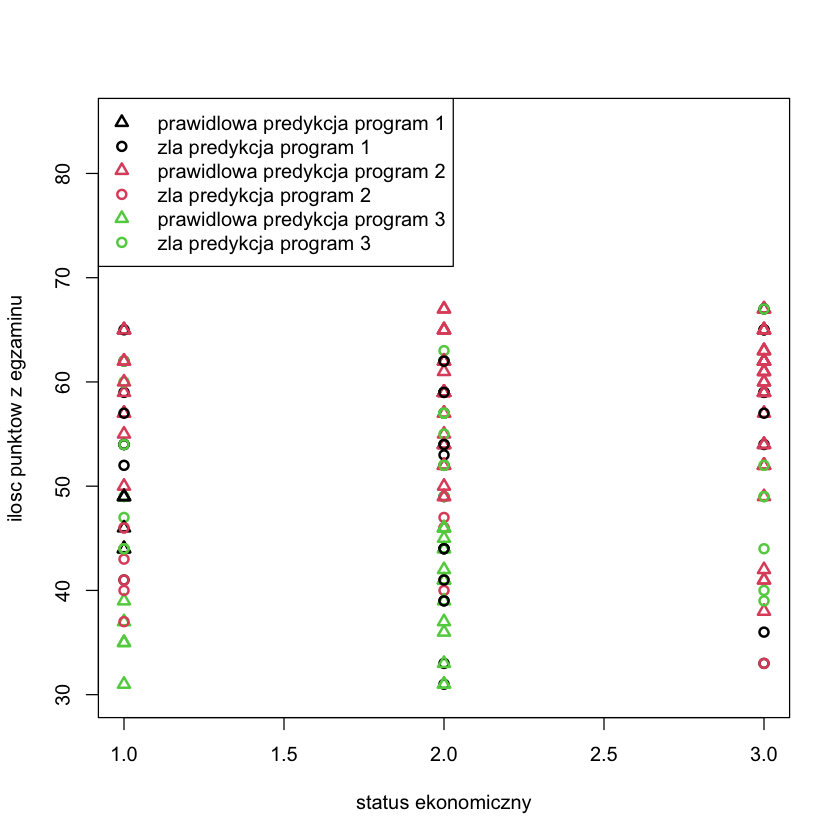

In [56]:
# wykreslenie rysnuku wartosci prawdopodobienstw
plot(as.numeric(uczniowie$status.ek.), uczniowie$pisanie, xlab = "status ekonomiczny", ylab = "ilosc punktow z egzaminu", col = uczniowie$program, pch = sprawdzenie_predykcji_model_log_lin_4 + 1, lwd = 2, ylim = c(30, 85))
# na osi OX mamy status ekonomiczny, a na osi OY wyniki egzaminu pisemnego, kolory beda symbolizowac okreslone programy
# zmieniamy troche zakres osi OY, aby bylo miejsce na legende
# dodanie legendy
legend("topleft", c("prawidlowa predykcja program 1", "zla predykcja program 1", "prawidlowa predykcja program 2", "zla predykcja program 2", "prawidlowa predykcja program 3", "zla predykcja program 3"), col = c(1, 1, 2, 2, 3, 3), pch = c(2, 1, 2, 1, 2, 1), lwd = 2, lty = NA)